In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# *Extraction*

In [ ]:
df = pd.read_csv("fastfood.csv")
df


# *Transform*

In [ ]:
df = df.drop(['salad', 'vit_a', 'vit_c', 'calcium', 'fiber'], axis=1)
df


In [ ]:
# Dropping items 'Lobster Roll, 'McRib', 'Chicken Burger' because.. confusing
df.drop([15, 21, 238], axis = 0, inplace=True)
df

In [ ]:
df['type'] = np.nan
df

In [ ]:
df['type'] = np.where( (df['restaurant'] != 'Subway') & ((df['item'].str.contains("Chick")) | (df['item'].str.contains("Tenders"))) & (df['item'].str.contains("Salad") == False), "Chicken", df['type'])
df

In [ ]:
df['type'] = np.where(df['item'].str.contains("Fish"), "Fish", df['type'])
df

In [ ]:
df['type'] = np.where(df['item'].str.contains("Salad"), "Salad", df['type'])
df

In [ ]:
df['type'] = np.where(df['item'].str.contains("Burger", case=False), "Burger", df['type'])
df

In [ ]:
df['type'] = np.where((df['restaurant'] == 'Mcdonalds') & (((df['item'].str.contains("Chicken") == False) & (df['item'].str.contains("Tenders") == False) & (df['item'].str.contains("Salad") == False) & (df['item'].str.contains("Fish") == False))), "Burger", df['type'])
df

In [ ]:
df.loc[df['restaurant'] == 'Chick Fil-A']
df['type'] = np.where( (df['restaurant'] == 'Chick Fil-A') & (df['type'] == 'nan'), "Chicken", df['type'])
df.loc[df['restaurant'] == 'Chick Fil-A']

In [ ]:
df.loc[(df['restaurant'] == 'Sonic') & (df['type'] == 'nan')]
df['type'] = np.where( (df['restaurant'] == 'Sonic') & (df['type'] == 'nan'), "Other", df['type'])
df.loc[df['restaurant'] == 'Sonic']

In [ ]:
df.loc[(df['restaurant'] == 'Arbys') & (df['type'] == 'nan')]
df['type'] = np.where( (df['restaurant'] == 'Arbys') & (df['type'] == 'nan'), "Sub/Sandwich", df['type'])
df.loc[df['restaurant'] == 'Arbys']

In [ ]:
df.loc[(df['restaurant'] == 'Burger King') & (df['type'] == 'nan')]
df['type'] = np.where( (df['restaurant'] == 'Burger King') & (df['item'].str.contains("Dog")) & (df['type'] == 'nan'), "Other", df['type'])
df['type'] = np.where( (df['restaurant'] == 'Burger King') & (df['type'] == 'nan'), "Burger", df['type'])
df.loc[df['restaurant'] == 'Burger King']

In [ ]:
df.loc[(df['restaurant'] == 'Dairy Queen') & (df['type'] == 'nan')]
df['type'] = np.where( (df['restaurant'] == 'Dairy Queen') & (df['item'].str.contains("Dog")) & (df['type'] == 'nan'), "Other", df['type'])
df['type'] = np.where( (df['restaurant'] == 'Dairy Queen') & (df['item'].str.contains("Sandwich")) & (df['type'] == 'nan'), "SubSandwich", df['type'])
df['type'] = np.where( (df['restaurant'] == 'Dairy Queen') & (df['type'] == 'nan'), "Other", df['type'])
df.loc[df['restaurant'] == 'Dairy Queen']

In [ ]:
df.loc[(df['restaurant'] == 'Subway') & (df['type'] == 'nan')]
df['type'] = np.where( (df['restaurant'] == 'Subway') & (df['item'].str.contains("Pizza")) & (df['type'] == 'nan'), "Other", df['type'])
df['type'] = np.where( (df['restaurant'] == 'Subway') & (df['type'] == 'nan'), "Sub/Sandwich", df['type'])
df.loc[df['restaurant'] == 'Subway']


In [ ]:
df.loc[(df['restaurant'] == 'Taco Bell') & (df['type'] == 'Sub/Sandwich')]
df['type'] = np.where( (df['restaurant'] == 'Taco Bell') & (df['type'] == 'nan'), "Other", df['type'])
df.loc[df['restaurant'] == 'Taco Bell']

In [ ]:
mcd_df = df.loc[df['restaurant'] == 'Mcdonalds'].copy()
cfa_df = df.loc[df['restaurant'] == 'Chick Fil-A'].copy()
sonic_df = df.loc[df['restaurant'] == 'Sonic'].copy()
arbys_df = df.loc[df['restaurant'] == 'Arbys'].copy()
bk_df = df.loc[df['restaurant'] == 'Burger King'].copy()
dq_df = df.loc[df['restaurant'] == 'Dairy Queen'].copy()
sub_df = df.loc[df['restaurant'] == 'Subway'].copy()
taco_df = df.loc[df['restaurant'] == 'Taco Bell'].copy()

# *Analyze*

In [ ]:
print(f"Maximum Calories: {df.calories.max()}")
print(f"Minimum Calories: {df.calories.min()}")
print(f"Average Calories: {df.calories.mean().round(2)}")

In [ ]:
print(f"Maximum Protein: {df.protein.max()}")
print(f"Minimum Protein: {df.protein.min()}")
print(f"Average Protein: {df.protein.mean().round(2)}")

In [ ]:
print(f"Maximum Carbohydrates: {df.total_carb.max()}")
print(f"Minimum Carbohydrates: {df.total_carb.min()}")
print(f"Average Carbohydrates: {df.total_carb.mean().round(2)}")

In [ ]:
print(f"Maximum Sodium: {df.sodium.max()}")
print(f"Minimum Sodium: {df.sodium.min()}")
print(f"Average Sodium: {df.sodium.mean().round(2)}")

In [ ]:
print("Maximum Calories per Restaurant:")
print(df.groupby('restaurant')['calories'].max().sort_values(ascending=False))

In [ ]:
print("\nMinimum Calories per Restaurant:")
print(df.groupby('restaurant')['calories'].min().sort_values())

In [ ]:
print("\nAverage Calories per Restaurant:")
print(df.groupby('restaurant')['calories'].mean().round(2))

In [ ]:
df.groupby("restaurant")["calories"].agg(['sum', 'mean', 'min', 'max'])

In [ ]:
df.groupby("restaurant")["protein"].agg(['sum', 'mean', 'min', 'max'])

In [ ]:
df.groupby("restaurant")["total_carb"].agg(['sum', 'mean', 'min', 'max'])

In [ ]:
df.groupby("restaurant")["sodium"].agg(['sum', 'mean', 'min', 'max'])

In [ ]:
df.describe()

In [ ]:
chicken_df = df.loc[df['type'] == 'Chicken'].copy()
chicken_df

In [ ]:
burger_df = df.loc[df['type'] == 'Burger'].copy()
burger_df

In [ ]:
fish_df = df.loc[df['type'] == 'Fish'].copy()
fish_df

In [ ]:
salad_df = df.loc[df['type'] == 'Salad'].copy()
salad_df

In [ ]:
other_df = df.loc[df['type'] == 'Other'].copy()
other_df

In [ ]:
print("Maximum Calories per Restaurant (Chicken):")
print(chicken_df.groupby('restaurant')['calories'].max().sort_values(ascending=False))

In [ ]:
print("Maximum Calories per Restaurant (Burgers):")
print(burger_df.groupby('restaurant')['calories'].max().sort_values(ascending=False))

In [ ]:
print("Maximum Calories per Restaurant (Fish):")
print(fish_df.groupby('restaurant')['calories'].max().sort_values(ascending=False))

In [ ]:
print("Maximum Calories per Restaurant (Salad):")
print(salad_df.groupby('restaurant')['calories'].max().sort_values(ascending=False))

In [ ]:
print("Maximum Calories per Restaurant (Other):")
print(other_df.groupby('restaurant')['calories'].max().sort_values(ascending=False))

# *Visualize*

<Axes: title={'center': 'Calories per Salad at Mcdonalds'}, xlabel='calories', ylabel='item'>

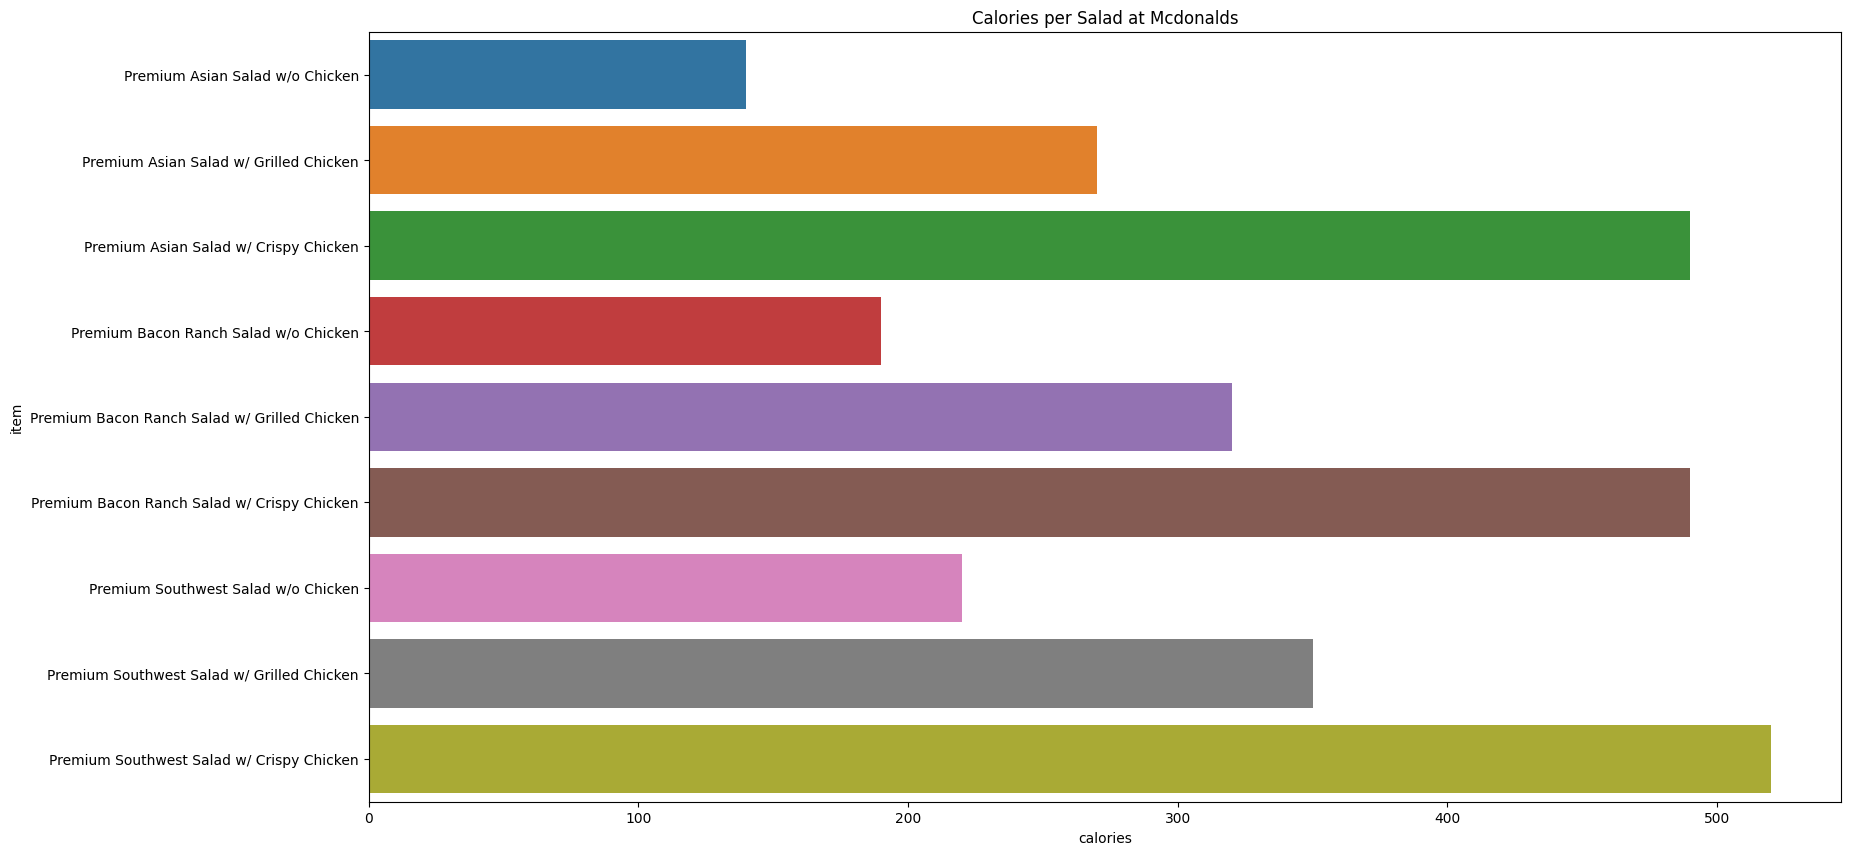

In [553]:
salad_graph = mcd_df[(mcd_df['type'] == 'Salad')]
plt.figure(figsize=(19, 10))
plt.title('Calories per Salad at Mcdonalds')
sns.barplot(y=salad_graph['item'], x=df['calories'])



<Axes: title={'center': 'Calories across different Restaurants (Salads)'}, xlabel='restaurant', ylabel='calories'>

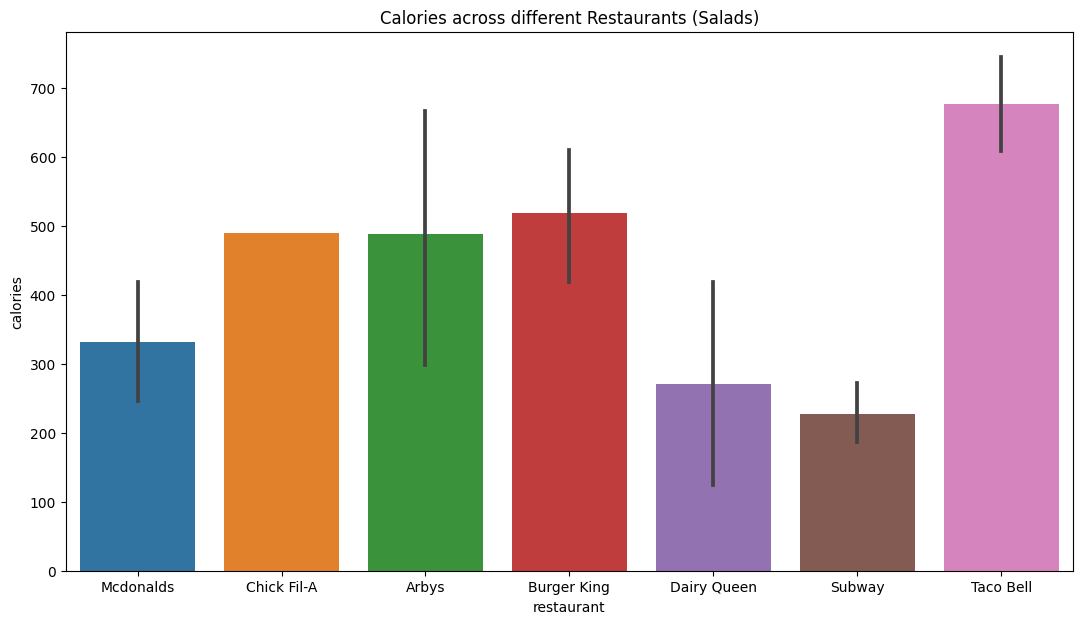

In [546]:
plt.figure(figsize=(13, 7))
plt.title('Calories across different Restaurants (Salads)')
sns.barplot(y=salad_df['calories'], x=salad_df['restaurant'])





 

[Text(0.5, 1.0, 'Fish')]

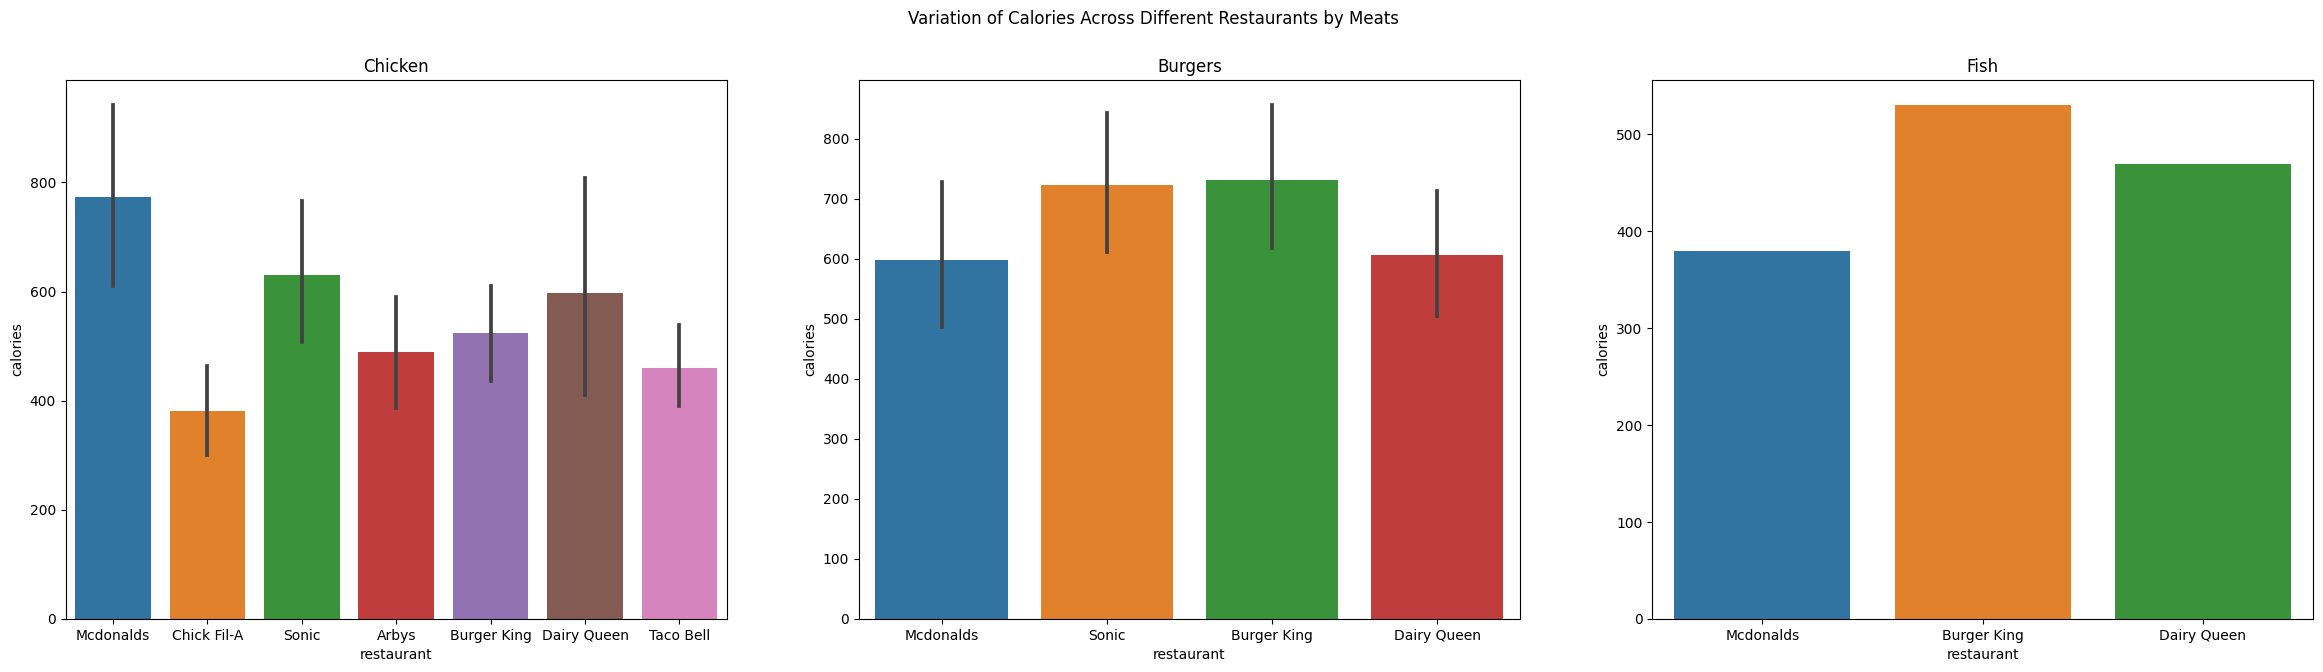

In [547]:
fig, axes = plt.subplots(1, 3, figsize=(29, 7))
 
fig.suptitle('Variation of Calories Across Different Restaurants by Meats')
 

sns.barplot(ax=axes[0],data=chicken_df, y=chicken_df['calories'], x=chicken_df['restaurant']).set(title='Chicken')
sns.barplot(ax=axes[1], data=burger_df, y=burger_df['calories'], x=burger_df['restaurant']).set(title='Burgers')
sns.barplot(ax=axes[2],data=fish_df, y=fish_df['calories'], x=fish_df['restaurant']).set(title= 'Fish')

<Axes: title={'center': 'Calories per Fish Items'}, xlabel='item', ylabel='calories'>

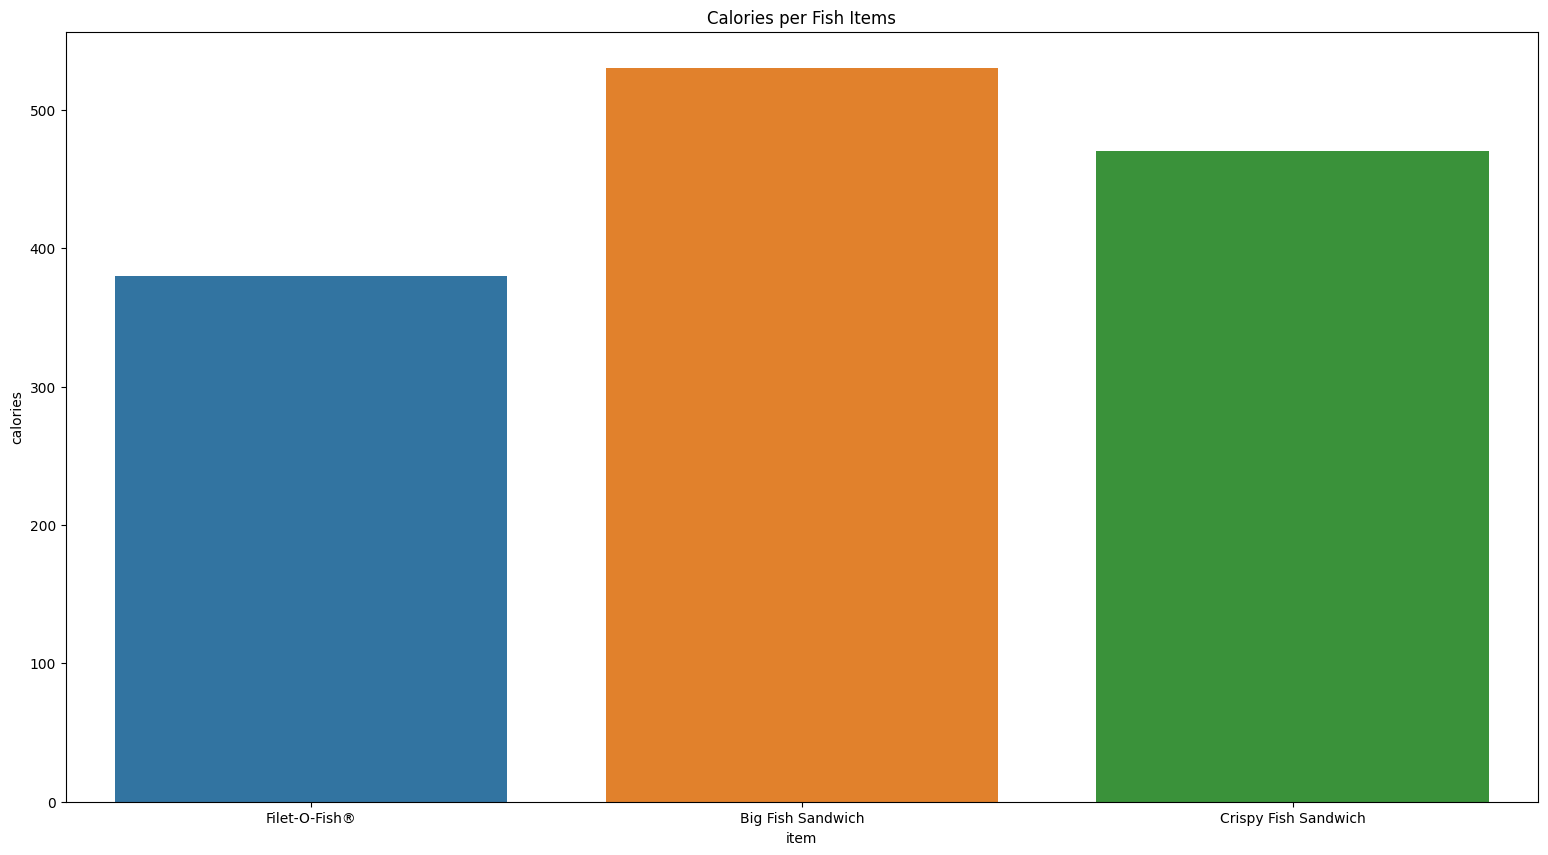

In [554]:
fish_graph = df[(df['type'] == 'Fish')]
plt.figure(figsize=(19, 10))
plt.title('Calories per Fish Items')
sns.barplot(y=df['calories'], x=fish_graph['item'])